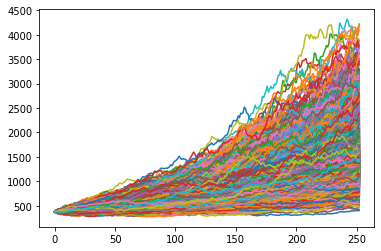

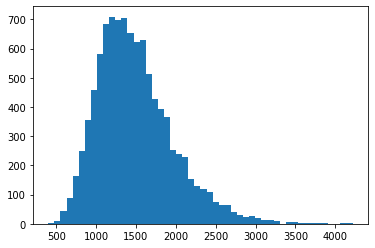

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
from datetime import date, datetime, timedelta

#Choose Stock
tick = 'AAPL'

#Choose years
ys = 3

#Choose Simultations
sims = 10000

stock = data.DataReader(tick, 'yahoo',start = datetime.today() - timedelta(365*ys), end = datetime.today())

S = stock['Adj Close'][-1] 
T = 252 
mu = (stock['Adj Close'][251*ys-1]/stock['Adj Close'][0])**(1/ys)
vol = stock['Adj Close'].pct_change().std()*math.sqrt(252) 

result = []
for i in range(sims):
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1

    price_list = [S]
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    plt.plot(price_list)
    
    result.append(price_list[-1])

plt.show()
plt.hist(result,bins=50)
plt.show()

In [3]:
print(round(np.mean(result),2))
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

1492.54
5% quantile = 845.2762103242775
95% quantile = 2396.242752439605


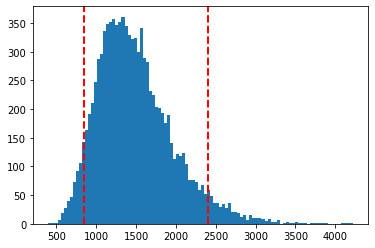

In [4]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
#sauce
#https://www.pythonforfinance.net/2016/11/28/monte-carlo-simulation-in-python/